# Mushroom Classification

**Objective**

Determine whether a mushroom is edible or poisonous based on the provided categorical features.

**Context**

This dataset was taken from [Kaggle](https://www.kaggle.com/uciml/mushroom-classification) but also available on the UCI ML Repository. The Kaggle description is as follows:

> This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

**About this file**

Attribute Information: (classes: edible=e, poisonous=p)
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Mushroom Facts

Here are some pictures according to the [mushroom glossary](https://www.usask.ca/biology/fungi/glossary.html).

cap shapes
![1](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic15)

cap surfaces
![2](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic16)

gill spacings
![3](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic17)

gill attachment
![4](https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic19)


## Set up Data

In [29]:
# import packages
import pandas as pd
import numpy as np
import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.style.use("sg")
%matplotlib inline

# prediction
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    accuracy_score,
)

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
# Read file
df = pd.read_csv("mushrooms.csv")

print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<IPython.core.display.Javascript object>

In [3]:
# Count unique
df.melt().groupby("variable").nunique()["value"]

variable
bruises                      2
cap-color                   10
cap-shape                    6
cap-surface                  4
class                        2
gill-attachment              2
gill-color                  12
gill-size                    2
gill-spacing                 2
habitat                      7
odor                         9
population                   6
ring-number                  3
ring-type                    5
spore-print-color            9
stalk-color-above-ring       9
stalk-color-below-ring       9
stalk-root                   5
stalk-shape                  2
stalk-surface-above-ring     4
stalk-surface-below-ring     4
veil-color                   4
veil-type                    1
Name: value, dtype: int64

<IPython.core.display.Javascript object>

In [4]:
# Replace hyphens with underscore
df.columns = df.columns.str.replace("-", "_")

<IPython.core.display.Javascript object>

In [5]:
# Make class a binary variable (1=poisonous, 0=edible)
df["class"] = (df["class"] == "p").astype("int")

<IPython.core.display.Javascript object>

In [6]:
# Convert ring_number to numerical
rn = {"n": 0, "o": 1, "t": 2}
df["ring_number"] = df["ring_number"].apply(lambda x: rn.get(x))

<IPython.core.display.Javascript object>

In [7]:
# Drop stalk_root because it has missing values (values are "?")
df.drop(["stalk_root"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [8]:
# Drop veil_type because there's only 1 distinct value
df.drop(["veil_type"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
df.head(1)

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,1,p,k,s,u


<IPython.core.display.Javascript object>

## Exploratory Analysis

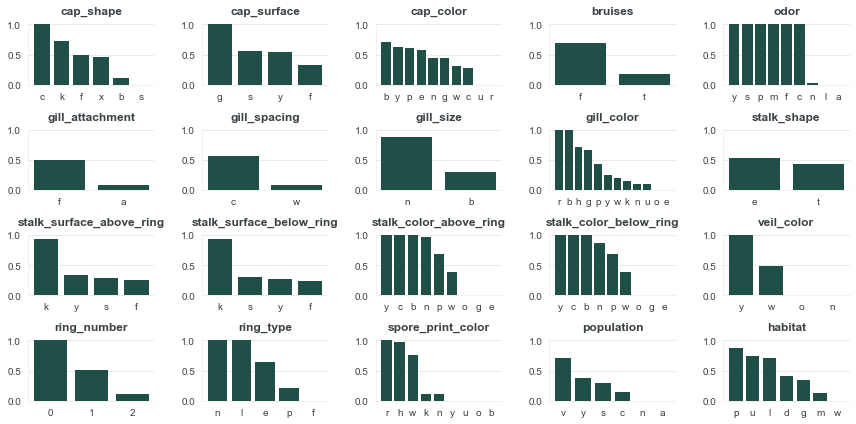

<IPython.core.display.Javascript object>

In [10]:
# See poison rate for each feature

fig, axes = plt.subplots(4, 5, figsize=[12, 6])
axes = axes.flatten()

for index, col in enumerate(df.columns[1:]):

    p = df.groupby(col).mean()["class"].sort_values(ascending=False)

    ax = axes[index]
    ax.bar(x=p.index, height=p.values)

    ax.set_ylim(0, 1)
    ax.set_title(col)

plt.tight_layout()

**Strong Indicators**
* `odor` looks like a strong indicator (almost black and white) for whether a mushroom is poisonous or edible.
* `stalk_color_above_ring` and`stalk_color_below_ring` as yellow, cinnamon, buff, or brown highly suggests poisonous. Orange, gray, or red suggest edible. These 2 variables look highly correlated.
* `ring_type` as none or large highly suggests poisonous but as flaring suggests edible.
* `veil_color` has decent indicators when any color except white.
* `spore_print_color` also shows extremes.

**Weak Indicators**
* `stalk_shape` is pretty 50-50 between poisonous and edible.
* `cap_color` is also not very extreme. This is somewhat surprising because this feature is probably the first thing non-experts would use to guess.

## Preprocessing

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

Create dummy variables.

In [46]:
# Shortcut way :P
# data = pd.get_dummies(df)
# X = data.iloc[:, 1:]
# y = data.iloc[:, 0]

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X = OneHotEncoder().fit_transform(X).toarray()
y = LabelEncoder().fit_transform(y)

<IPython.core.display.Javascript object>

Create a train and test set.

In [127]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

<IPython.core.display.Javascript object>

## K-Means Clustering

Maybe we can use K-means clustering to see if there are natural fits. There are 23 species in the dataset, which means we're creating 23 clusters.

In [62]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [49]:
# Create color palette with >23 colors
colors = [
    (2, 63, 165),
    (125, 135, 185),
    (190, 193, 212),
    (214, 188, 192),
    (187, 119, 132),
    (142, 6, 59),
    (74, 111, 227),
    (133, 149, 225),
    (181, 187, 227),
    (230, 175, 185),
    (224, 123, 145),
    (211, 63, 106),
    (17, 198, 56),
    (141, 213, 147),
    (198, 222, 199),
    (234, 211, 198),
    (240, 185, 141),
    (239, 151, 8),
    (15, 207, 192),
    (156, 222, 214),
    (213, 234, 231),
    (243, 225, 235),
    (246, 196, 225),
    (247, 156, 212),
]

# Markers for outcomes
markers = {1: "o", 0: "x"}

<IPython.core.display.Javascript object>

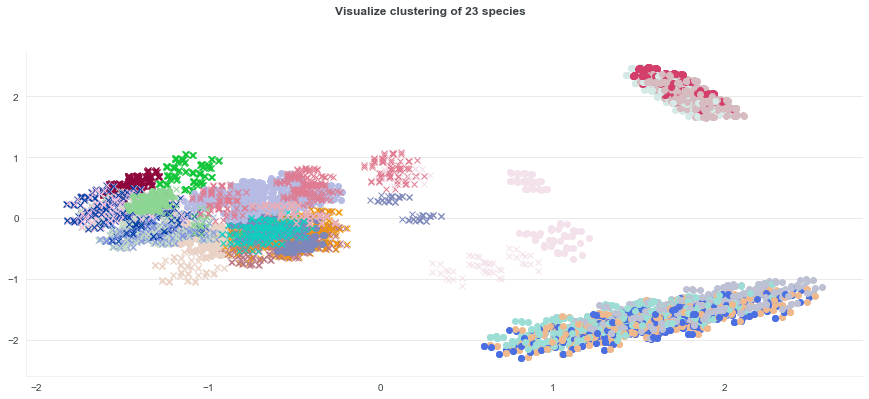

<IPython.core.display.Javascript object>

In [50]:
# Fit k-means clustering model with data
kmeans = KMeans(n_clusters=23, random_state=42).fit(X)

# Use PCA to reduce to 2D
pca = PCA(n_components=2).fit(X).transform(X)

fig, ax = plt.subplots(figsize=[15, 6])

for i in range(pca.shape[0]):

    r, g, b = colors[kmeans.labels_[i]]
    c = "#%02x%02x%02x" % (r, g, b)
    ax.scatter(
        pca[i, 0], pca[i, 1], c=c, alpha=1, marker=markers.get(y[i]), linewidth=1,
    )

fig.suptitle("Visualize clustering of 23 species")
plt.show()

Visually, the model is actually pretty good in separating species because most species (by color) seems to have a distinct classification (by marker). If the same color group has both o and x markers, then the model did not cluster that species correctly.

In [51]:
# Create table of results
results = np.append(pca, kmeans.labels_.reshape(-1, 1), 1)
results = np.append(results, np.array(y).reshape(-1, 1), 1)
results = pd.DataFrame(results)
results.columns = ["x", "y", "k_group", "class"]
results["k_group"] = results["k_group"].astype("int")
results["class"] = results["class"].astype("int")

results.head()

,x,y,k_group,class
0,-1.145510,-0.398433,15,1
1,-1.401846,0.543146,5,0
2,-1.553022,0.300245,5,0
3,-1.230153,-0.106082,15,1
4,-0.755858,-0.479208,4,0


<IPython.core.display.Javascript object>

In [52]:
stats = results.groupby("k_group").agg({"class": ["mean", "count"]})["class"]

stats

,mean,count
k_group,,
0,0.000000,432
1,0.571429,336
2,1.000000,459
3,1.000000,594
4,0.000000,384
5,0.000000,512
6,1.000000,405
7,0.000000,432
8,1.000000,288


<IPython.core.display.Javascript object>

In [53]:
accuracy = (
    stats[(stats["mean"] == 0) | (stats["mean"] == 1)]["count"].sum() / results.shape[0]
)
print(f"Accuracy is {round(accuracy*100, 2)}%")

Accuracy is 88.43%


<IPython.core.display.Javascript object>

20 of the 23 species have 100% accuracy on classifying whether they are posionous. Assuming if 100% accuracy is true for those 23 species, then we have achieved at least 91% accuracy on the dataset.

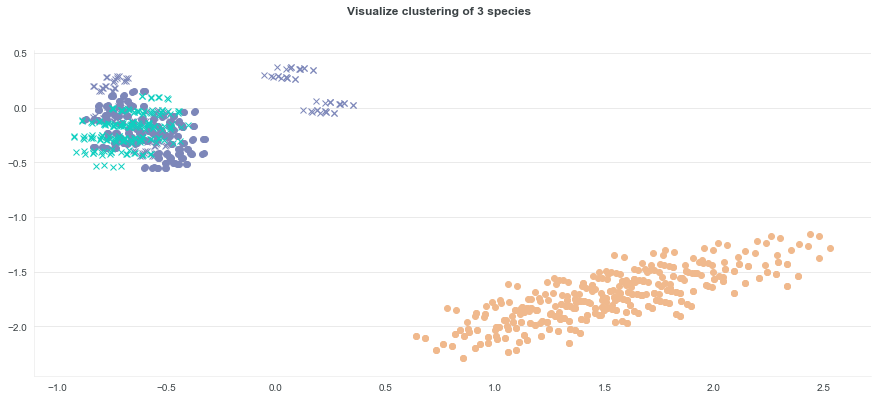

<IPython.core.display.Javascript object>

In [54]:
# Regraph the clustering for the 3 uncertain species

fig, ax = plt.subplots(figsize=[15, 6])

for i in range(pca.shape[0]):

    if kmeans.labels_[i] in (1, 16, 18):
        r, g, b = colors[kmeans.labels_[i]]
        c = "#%02x%02x%02x" % (r, g, b)
        ax.scatter(
            pca[i, 0],
            pca[i, 1],
            c=c,
            alpha=1,
            marker=markers.get(y[i]),
            linewidth=1,
        )

fig.suptitle("Visualize clustering of 3 species")
plt.show()


In [55]:
compare = pd.merge(results, stats.reset_index(), how="inner", on="k_group")
compare["class_pred"] = compare["mean"].apply(lambda x: int(round(x)))

<IPython.core.display.Javascript object>

In [56]:
precision = precision_score(compare["class"], compare["class_pred"])
recall = recall_score(compare["class"], compare["class_pred"])
f1 = f1_score(compare["class"], compare["class_pred"])

print(f"Precision: {round(precision*100,1)}%")
print(f"Recall: {round(recall*100,1)}%")
print(f"F1: {round(f1*100,1)}%")

confusion_matrix(compare["class"], compare["class_pred"])

Precision: 92.1%
Recall: 100.0%
F1: 95.9%


array([[3872,  336],
       [   0, 3916]])

<IPython.core.display.Javascript object>

It's better to have a higher recall score (less false negatives), since eating a poisonous mushroom could be deadly.

## Test Models

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

<IPython.core.display.Javascript object>

In [119]:
def evaluate(model, x_test, y_test):
    """
    Print scores for a given model and training sets+labels.
    """
    precision = precision_score(y_test, model.predict(x_test))
    recall = recall_score(y_test, model.predict(x_test))
    f1 = f1_score(y_test, model.predict(x_test))
    accuracy = accuracy_score(y_test, model.predict(x_test))

    print(f"Precision: {round(precision*100,1)}%")
    print(f"Recall: {round(recall*100,1)}%")
    print(f"F1: {round(f1*100,1)}%")
    print(f"Accuracy: {round(accuracy*100,1)}%")

<IPython.core.display.Javascript object>

### Logistic Regression

In [128]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

evaluate(lr, x_test, y_test)

Precision: 100.0%
Recall: 99.9%
F1: 100.0%
Accuracy: 100.0%


<IPython.core.display.Javascript object>

### Decision Tree

In [129]:
dtc = DecisionTreeClassifier(random_state=42)
parameters = {"max_leaf_nodes": [5, 10, 15]}

# Use Grid Search for parameters
dtc = GridSearchCV(dtc, parameters)
dtc.fit(x_train, y_train)

dtc = DecisionTreeClassifier(max_leaf_nodes=dtc.best_params_["max_leaf_nodes"])
dtc.fit(x_train, y_train)
evaluate(dtc, x_test, y_test)

Precision: 100.0%
Recall: 100.0%
F1: 100.0%
Accuracy: 100.0%


<IPython.core.display.Javascript object>

## Random Forest 

In [130]:
rf = RandomForestClassifier(random_state=42)
parameters = {
    "max_leaf_nodes": [5, 10, 15],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False],
}

# Use Grid Search for parameters
rf = GridSearchCV(rf, parameters)
rf.fit(x_train, y_train)

print(rf.best_params_)
rf = RandomForestClassifier(
    max_leaf_nodes=rf.best_params_["max_leaf_nodes"],
    criterion=rf.best_params_["criterion"],
    bootstrap=rf.best_params_["bootstrap"],
)
rf.fit(x_train, y_train)
evaluate(rf, x_test, y_test)

{'bootstrap': True, 'criterion': 'entropy', 'max_leaf_nodes': 15}
Precision: 100.0%
Recall: 99.8%
F1: 99.9%
Accuracy: 99.9%


<IPython.core.display.Javascript object>

### K Neighbors

In [131]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

evaluate(kn, x_test, y_test)

Precision: 100.0%
Recall: 100.0%
F1: 100.0%
Accuracy: 100.0%


<IPython.core.display.Javascript object>

## Conclusion

With 40% of the dataset as the test set and 60% as the training set, most models perform well very well for identifying mushroom edibility. Accuracy is near 100% for these models.